<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. [Normalizar para las columnas numéricas con procesamiento **StandardScaler**.](#e1)

2. [Realice un gráfico de correlación. Identifique la existencia de colinealidad.](#e2)

3. [Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.](#e3)

4. [Devuelva un dataframe con las componentes principales.](#e4)

5. [Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.](#e5)

<a id='e1'></a>
**1.** 


In [3]:
# 1 Normalizar usando StandardScaler

x = df.drop(['id','diagnosis'], axis = 1).values
y = df.loc[:,['id','diagnosis']].values

x = StandardScaler().fit_transform(x)

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<a id='e2'></a>
**2.**

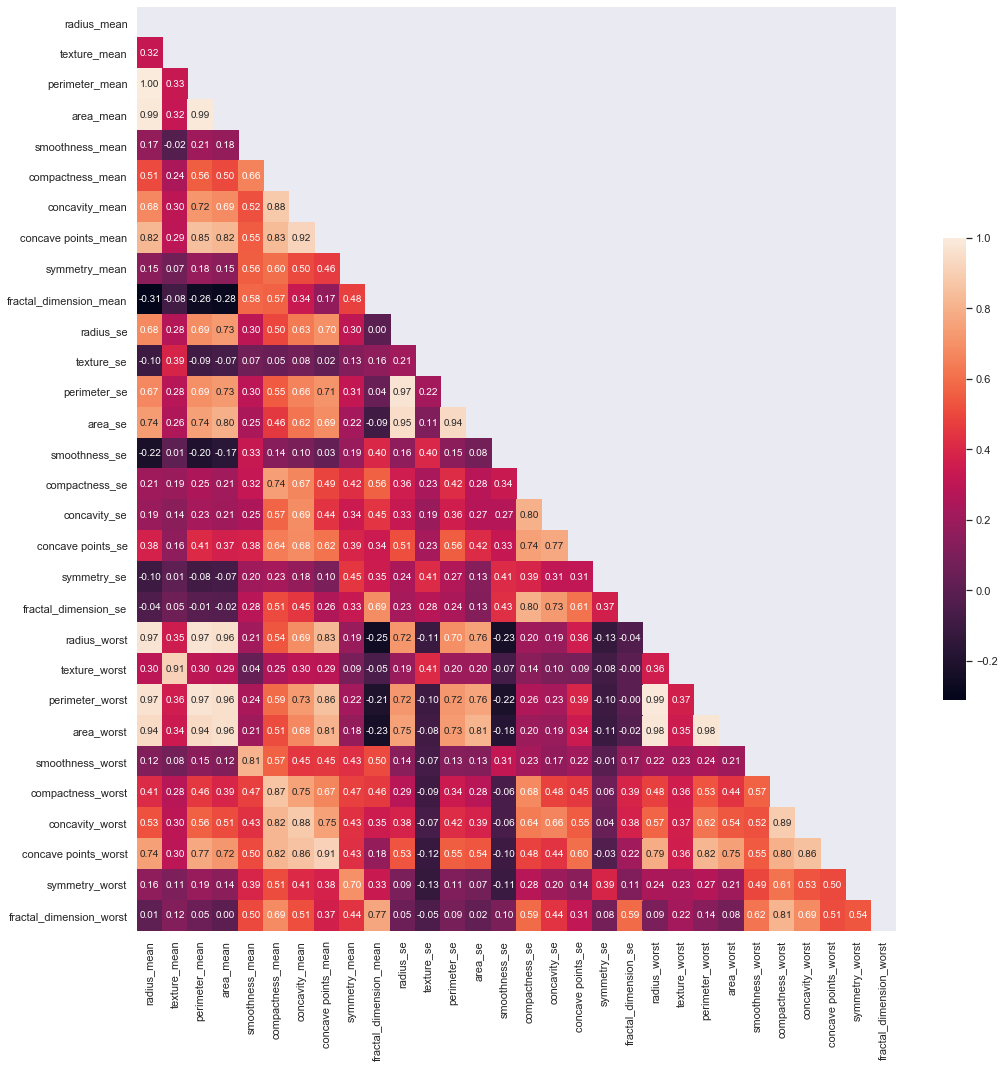

In [5]:
# 2 Gráfico de correlación (ver referencia)

dff = pd.DataFrame(x,columns=df.drop(['id','diagnosis'], axis = 1).columns)
corr = dff.corr()

# crear mascara para eliminar diagonal y celdas sobre la diagonal
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(17,17))

sns.heatmap(
    corr, # matriz de correlacion
    mask = mask, # aplicar mascara
    annot=True,  # imprimir numeros en celdas
    cbar_kws={"shrink": .5}, # achicar la leyenda de la barra de colores  
    ax = ax, # seleccionar ejes donde se ploteará
    fmt=".2f" # dar formato de dos decimales
)
a = ax.set_ylim(ax.get_ylim()[0] + 0.5, ax.get_ylim()[1]- 0.5) # arregla un bug que achicaba el eje y

Mientras mas claro el color de las celdas, más relacionadas estan entre sí las variables correspondientes a la fila con la de la columna y mientras más oscura la celda hay menos correlación. Se aprecian varios conjuntos de variables con correlación alta, es decir se podrían explicar estas variables a partir de otras colineales, disminuyendo la dimensión de los datos a analizar.

En general las variables (promedio y worst) correspondientes al radio, perímetro y área de los núcleos presentan alta correlación. Se puede visualizar con scatterplot, por ejemplo para los promedios de perímetro y radio:

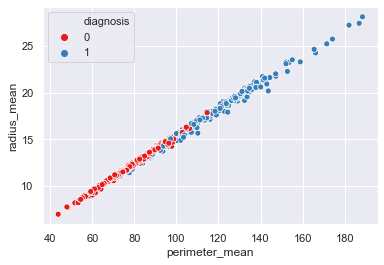

In [6]:
#sns.set(rc={'figure.figsize':(12,4)})

sns.scatterplot(x='perimeter_mean',
                y='radius_mean',
                hue = 'diagnosis',
                palette="Set1",
                data=df)

Se observa clara correlacion lineal, es decir las variables son colineales. Con PCA se podría disminuir la dimensión del problema. (Recordar que los datos han sidos normalizados)

<a id='e3'></a>
**3.** 

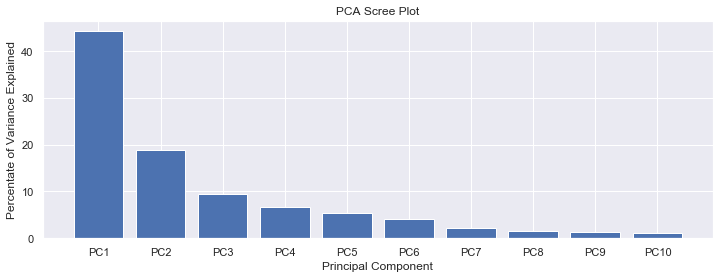

In [7]:
# 3 Ajuste PCA 

# ajustar modelo
n = 10
pca = PCA(n_components = n)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals = 2)
# crear lista para etiquetar varianzas en el gráfico
columns = [f'PC{i}' for i in range(1,n+1)]

plt.figure(figsize=(12,4))
plt.bar(x= range(1,n+1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

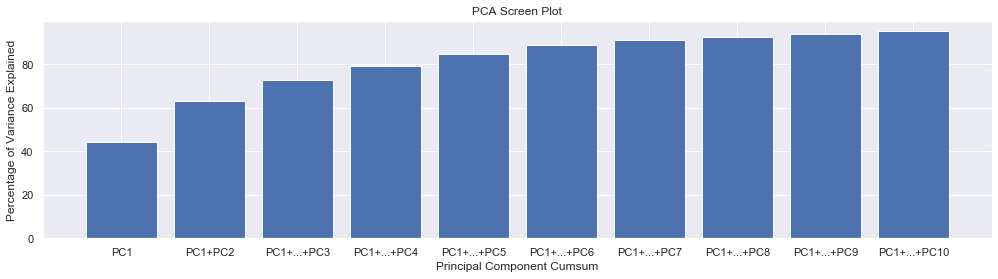

,0,1,2,3,4,5,6,7,8,9
Principal Component Cumsum,PC1,PC1+PC2,PC1+...+PC3,PC1+...+PC4,PC1+...+PC5,PC1+...+PC6,PC1+...+PC7,PC1+...+PC8,PC1+...+PC9,PC1+...+PC10
Percentage of Variance Explained,44.27,63.24,72.63,79.23,84.73,88.75,91,92.59,93.98,95.15


In [8]:
# varianza por suma acumulada de las componentes
percent_variance_cum = np.cumsum(percent_variance)
#crear lista para etiquetar las varianzas acumuladas en el gráfico
columns_cs = ['PC1','PC1+PC2']
{columns_cs.append(f'PC1+...+PC{i}') for i in range(3,n+1)} 

plt.figure(figsize=(17,4))
plt.bar(x = range(1,n+1), height=percent_variance_cum, tick_label=columns_cs)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Screen Plot')
plt.show()
#imprimir los valores de las varianzas acumuladas
pd.DataFrame([columns_cs, percent_variance_cum], index = ['Principal Component Cumsum', 'Percentage of Variance Explained'])


La varianza de las variables se puede explicar en 95.15% considerando 10 componentes principales. Se infiere que 10 es el número adecuado de componentes principales que presentan información significativa suficiente para estudiar los datos.

<a id='e4'></a>
**4.** 

In [9]:
# 4 Crear dataframe de a partir de componentes principales

principalDf = pd.DataFrame(data = principalComponents, columns = columns)
targetDf = df[['diagnosis']]

newDf = pd.concat([targetDf, principalDf], axis = 1)
newDf.head()

,diagnosis,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411425,2.159381,-0.398389,-0.157096,-0.877288
1,1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013348,0.240972,-0.711927,1.106900
2,1,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668162,0.097381,0.024078,0.454314
3,1,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405435,-1.116984
4,1,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936212,0.636378,-0.263805,0.377714


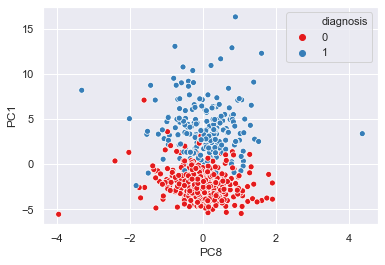

In [10]:
# se realiza un tanteo en dos de dimensiones cualesquiera para revisar correlación
#sns.set(rc={'figure.figsize':(12,4)})

sns.scatterplot(x='PC8',
                y='PC1',
                hue='diagnosis',
                palette="Set1",
                data=newDf)

<a id='e5'></a>
**5.** 

In [11]:
# 5 Clasificar
#importar modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
#importar script para computar metricas 
from metrics_classification import *
# se clasificara usando el dataframe con las componentes principales
Y = newDf['diagnosis']
X_new = newDf.drop(['diagnosis'], axis = 1)

# se intentó no usar directamente la clase SklearnClassificationModels creada en clases para comprender como funciona
# se implementa como un for para crear el dataframe final con las métricas de 4 modelos a partir de un diccionario
model_lr = LogisticRegression()
model_svc = SVC(gamma=2, C=1)
model_dtc = DecisionTreeClassifier(max_depth = 5)
model_rfc = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
#crear diccionario
models = {model_lr: 'Logistic', 
          model_svc: 'SVM', 
          model_dtc: 'Decision Tree', 
          model_rfc: 'Random Forest'
         }

df_metrics =[]
#iterar sobre cada modelo
for model in models.keys():
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2, random_state = 2) 
    model.fit(X_train,Y_train)
    test = model.predict(X_test)
    df_temp = pd.DataFrame(
    {
        'y':Y_test,
        'yhat': model.predict(X_test)
    }
    )
    metrics_temp = summary_metrics(df_temp)
    metrics_temp['model'] = models[model]
    df_metrics.append(metrics_temp)

pd.concat(df_metrics).reset_index().drop('index', axis = 1)
    

,accuracy,recall,precision,fscore,model
0,0.9737,0.9705,0.9744,0.9724,Logistic
1,0.6053,0.5000,0.3026,0.3770,SVM
2,0.9298,0.9266,0.9266,0.9266,Decision Tree
3,0.7895,0.7411,0.8364,0.7526,Random Forest


Se puede notar que para el dataframe con las 10 componentes principales del dataframe original, al realizar clasiicación en 4 modelos, el modelo logístico presenta las mejores métricas, liderando en todas las categorías con puntajes superior a 0.97.
En tanto el modelo SVM presenta las peores métricas, por lo cual se puede haber inicializado con parámetros poco adecuados o simplemente no se ajusta bien a los datos. 

El modelo de Arboles de decisión también presenta metricas con valores superiores a 0.9 por lo que puede ser adecuado. En tercer lugar queda el random forest con métricas en el rango [0.86, 0.9].

## Referencias: 

1. [Gráfico de correlación](https://sodocumentation.net/seaborn/topic/10634/correlation-plot)

